<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/yanginsuk/EM_GaussianMix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [70]:
import scipy.io
mat = scipy.io.loadmat('/content/gdrive/My Drive/MyColab/Data/data10_2.mat')

In [71]:
X=mat.get('data')
X=X.T


In [78]:
import numpy.matlib
import math

def gausspdf(X, mu, sigma):
  #n=size(X,1);                            % 입력 벡터의 차원
  n=X[0,:].size
  #N=size(X,2);                            % 데이터의 수
  N=X[1,:].size
  #Mu=repmat(mu',1,N);                     % 행렬 연산을 위한 준비
  mu = mu.reshape(2,1)
  Mu = np.matlib.repmat(mu, 1, N)
  #% 확률 밀도값 계산
  #out = (1/((sqrt(2*pi))^n*sqrt(det(sigma))))*exp(-diag((X-Mu)'*inv(sigma)*(X-Mu))/2);
  XX= X-Mu
  YY = np.linalg.inv(sigma)
  ZZ = YY.dot(XX)
  return (1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(sigma))))*np.exp(-np.diag((XX.T).dot(ZZ))/2)
  
  #XX= X-Mu
  #YY = np.linalg.inv(sigma)
  #ZZ = XX.dot(YY)
  #return (1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(sigma))))*np.exp(-np.diag(ZZ.dot(XX.T))/2)
  #return (1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(Sigma))))*np.exp(-np.diag((X-Mu)*np.linalg.inv(sigma)*(X-Mu))/2)
  #return (1/ np.sqrt(2*np.pi * sigma**2))*np.exp(- (X-mu)**2/(2*sigma**2))

In [79]:
import matplotlib.pyplot as plt
import tensorflow as tf

def drawgraph(X, Mu, Sigma, cnt):
  M=Mu[:,1].size
  print("Mu=",Mu)
  plt.figure(num=cnt)
  plt.plot(X[0,:], X[1,:], marker='*', linestyle='None')
  plt.axis([-0.5, 5.5, -0.5, 3.5])
  plt.plot(Mu[:,0], Mu[:,1], marker='o', linestyle='None')
  print("M=",M)
  for j in range(M):
    print("j=",j)
    sigma = np.asarray(np.reshape(Sigma[j,:,:],(2,2)))
    print("sigma=",sigma)
    t=np.arange(-math.pi,math.pi,0.1)
    #A=math.sqrt(2)*[math.cos(t), math.sin(t)]*scipy.linalg.sqrtm(sigma)+ np.matlib.repmat(Mu[j-1,:],t.size,1)
    A=math.sqrt(2)*np.asarray([np.cos(t), np.sin(t)]).T.dot(scipy.linalg.sqrtm(sigma))+ np.matlib.repmat(Mu[j,:],t.size,1)
    plt.plot(A[:,0], A[:,1], marker='^', linestyle='None')
  plt.show()
  #figure(cnt);                            % 데이터 그리기
  #plot(X(1,:), X(2,:), '*'); hold on
  #axis([-0.5 5.5 -0.5 3.5]); grid on
  #plot(Mu(:,1), Mu(:,2), 'r*');            % 평균 파라미터 그리기
  #for j=1:M
  #  sigma = reshape(Sigma(j,:,:),2,2);  % 공분산에 따른 타원 그리기
  #  t=[-pi:0.1:pi]';
  #  A=sqrt(2)*[cos(t) sin(t)]*sqrtm(sigma)+repmat(Mu(j,:), size(t),1);
  #  plot(A(:,1), A(:,2), 'r-', 'linewidth', 2);
  #endfor

Mu= [[2.65954468 3.39900953]
 [1.21495604 2.81136647]
 [2.42545325 2.43376429]
 [0.0243323  1.08646272]
 [2.72714275 3.48701498]
 [4.48012006 0.80058671]]
M= 6
j= 0
sigma= [[1 0]
 [0 1]]
j= 1
sigma= [[1 0]
 [0 1]]
j= 2
sigma= [[1 0]
 [0 1]]
j= 3
sigma= [[1 0]
 [0 1]]
j= 4
sigma= [[1 0]
 [0 1]]
j= 5
sigma= [[1 0]
 [0 1]]


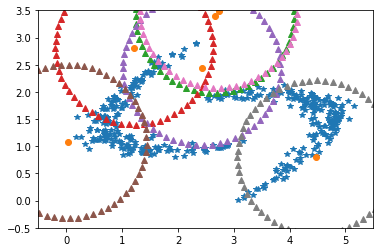

In [97]:
import numpy as np
import tensorflow as tf
type(X.size)
type(int(X.shape[0]))
N=int(X.shape[0])         # 데이터의 수
M=6;                      # 가우시안 성분의 수
Mu=np.random.rand(M, 2)*5

np_arr = np.array([[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]]])
Sigma = np_arr

drawgraph(X,Mu, Sigma,1);                   # 그래프 그리기 함수 호출

In [99]:
Maxtau=100;                                 # 최대 반복횟수 설정

alpha=np.zeros((6,1))+1/6;                  # 파라미터의 초기화(혼합계수)
px=np.zeros((6,400))
r=np.zeros((400,6))
#r=np.zeros((6,400))
L = np.zeros(Maxtau)

K=Mu[0,:]
K
for tau in range(Maxtau):
  ##E-Step
  for j in range(M):                        # p 계산
    
    px[j,:]=gausspdf(X, Mu[j,:], np.reshape(Sigma[j,:,:],(2,2)))
  
  sump=(px.T).dot(alpha)                      #a,p 계산
  for j in range(M):                        # p 계산
    K = (alpha[j]*px[j,:]).T/sump;
    r[:,j] = K[j,:]
  #ww = np.log(sump)
  L[tau]=sum(np.log(sump))
  ##M-step
  for j in range(M): 
    sumr=sum(r[:,j])
    Rj= (np.matlib.repmat(r[:,j],2,1))
    Mu[j,:]= sum(Rj*X,2)/sumr
    #Mu[j,:]=KK
    #Mu[j,1]=KK[1]
    #KK,Mu
    #Mu[j]=sum(RJ.dot(X),2)/sumr        #   % 새로운 평균
    #Rj=repmat(r(:,j),1,2)';             % 행렬 계산을 위한 준비
    #Mu(j,:)=sum(Rj.*X,2)/sumr           % 새로운 평균
Rj.shape


ValueError: ignored

In [ ]:
n=X[:,0].size
N=X[:,1].size
Mu = np.matlib.repmat(Mu.T, 1, N)

#% 확률 밀도값 계산
sigma = np.reshape(Sigma[j,:,:],(2,2))

Mu
#K = 1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(sigma)))*np.exp(-np.diag((X-Mu)*np.linalg.inv(sigma)*(X-Mu))/2)
#K=(X-Mu)*np.linalg.inv(sigma)*(X-Mu)
#K
#K = (1/(pow(math.sqrt(2*math.pi),n)*math.sqrt(np.linalg.det(Sigma))))*np.exp(-np.diag((X-Mu)*np.linalg.inv(sigma)*(X-Mu))/2)

ValueError: ignored